# Data Analytics
Notebook looking at general analytics of the data 

**"Narrowly defined, EDA and ESDA are focused on generating hypotheses, not testing them" (Anselin, 2019)**

Methods Used:
- Misc figure creation for Results section

In [170]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import scipy.stats as stats
import sys
sys.path.append('../utils')
import direction_functions
import analysis_functions
import matplotlib.dates as mdates
import matplotlib.colors as cm

%matplotlib inline

In [2]:
gdf = gpd.read_file("../app_route_data/trajets_mtl_trajet_2017.shp", encoding='utf-8') # utf-8 needed to read french letters

In [3]:
# outlier removal
gdf = gdf.loc[gdf.distance_m >= 50]
gdf = gdf.loc[gdf.seconds >= 60]
gdf = gdf.loc[gdf.distance_m <= 100000]
gdf = gdf.loc[gdf.seconds <= 10800]
gdf = gdf.reset_index(drop=True)

In [176]:
above1000_mode = gdf.groupby(['mode']).count()['id_trip'][gdf.groupby(['mode']).count()['id_trip'] > 300].index

In [5]:
# turn the data back into datetime
gdf['starttime'] = gdf['starttime'].apply(gpd.pd.to_datetime)
gdf['endtime'] = gdf['endtime'].apply(gpd.pd.to_datetime)
gdf['hour'] = gdf.starttime.apply(lambda tm: tm.hour)

In [7]:
one_modes = ["car", "cycling", "public_transport", "walking", "car_sharing", "taxi", "other", "not_available"]
one_pur = ['pick_up_a_person', 'work', 'shops', 'returning_home', 'health', 'leisure', 'education', 'other', 'cafe', 'not_available']

In [8]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,...,temporal_c,precip,temperatur,land_use,start_wgs,end_wgs,start_can,end_can,geometry,hour
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,...,0,0.000004,21.655905,None,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...,0
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,...,0,0.000000,20.182104,None,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...,2
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,...,0,0.000000,18.353766,None,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...,5
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,...,1,0.000000,18.353766,"['residential', 'employment', 'diversified act...",POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...,6
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,...,0,0.000000,18.353766,None,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...,6


In [22]:
gdf_purp = gdf.dropna(subset=['purpose']).reset_index(drop=True)

## Purpose and Mode

total data points for 'cycling': 13512


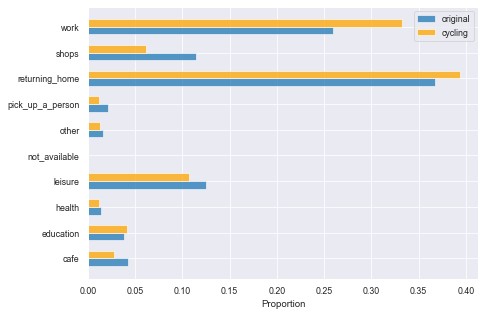

In [144]:
travel_mode = 'cycling'
col_order = ['0','1','2','3','4','5','6','7','8','9','10','11']

grouped_purpose_all = gdf.groupby('purpose').count()['mode'] / gdf.groupby('purpose').count()['mode'].sum()
grouped_purpose_other = analysis_functions.group_purpose(gdf, travel_mode, col_order)

fig, ax = plt.subplots(1, figsize=(7,5))
ind = np.arange(len(grouped_purpose_all))
height = .3

ax.barh(y=ind, width=grouped_purpose_all, height=height, alpha=.75)
ax.barh(y=ind+height, width=grouped_purpose_other,height=height, color='orange', alpha=.75)
ax.set_yticks(ind + height / 2)
ax.set_yticklabels(col_order)
ax.set_xlabel("Proportion")

ax.legend(['original',travel_mode]);

total data points for 'cycling': 13595


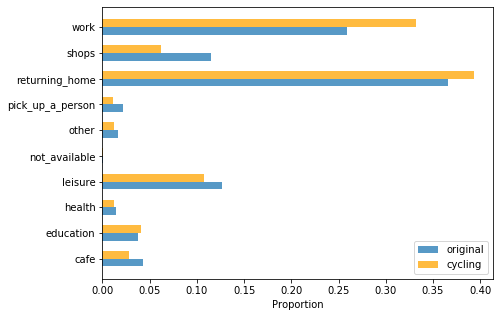

In [3]:
travel_mode = 'cycling'
col_order = ['cafe', 'education', 'health', 'leisure', 'not_available', 'other',\
         'pick_up_a_person', 'returning_home', 'shops', 'work']

grouped_purpose_all = gdf.groupby('purpose').count()['mode'] / gdf.groupby('purpose').count()['mode'].sum()
grouped_purpose_other = analysis_functions.group_purpose(gdf, travel_mode, col_order)

fig, ax = plt.subplots(1, figsize=(7,5))
ind = np.arange(len(grouped_purpose_all))
height = .3

ax.barh(y=ind, width=grouped_purpose_all, height=height, alpha=.75)
ax.barh(y=ind+height, width=grouped_purpose_other,height=height, color='orange', alpha=.75)
ax.set_yticks(ind + height / 2)
ax.set_yticklabels(col_order)
ax.set_xlabel("Proportion")

ax.legend(['original',travel_mode]);

In [4]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,start_wgs,end_wgs,start_can,end_can,geometry
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...


In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 185285 entries, 0 to 185284
Data columns (total 15 columns):
id_trip       185285 non-null int64
mode          74218 non-null object
purpose       74218 non-null object
starttime     185285 non-null object
endtime       185285 non-null object
seconds       185285 non-null int64
distance_m    185285 non-null float64
direction     185285 non-null float64
magnitude     185285 non-null float64
carddir       185285 non-null object
start_wgs     185285 non-null object
end_wgs       185285 non-null object
start_can     185285 non-null object
end_can       185285 non-null object
geometry      185285 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 21.2+ MB


In [5]:
gdf.groupby(['mode','seconds']).count()[gdf.groupby('mode').count()['purpose'] > 100]

/Applications/anaconda/envs/st-ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

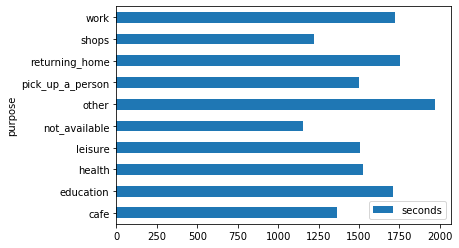

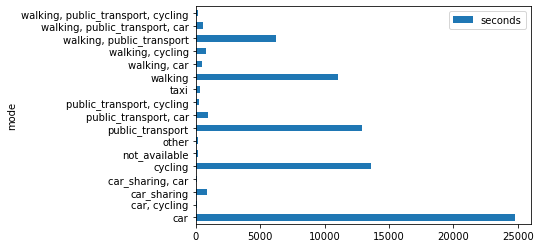

In [6]:
gdf.groupby(['purpose']).agg({'seconds':'mean'}).plot.barh()
gdf.groupby('mode').count()[gdf.groupby('mode').count()['purpose'] > 100].groupby(['mode']).agg({'seconds':'mean'}).plot.barh()

## bar chart of mode per hour

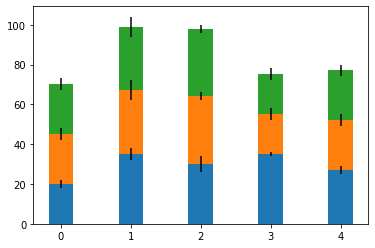

In [13]:
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
ind = np.arange(24)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

bars = np.add(menMeans, womenMeans).tolist()

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)
p2 = plt.bar(ind, enMeans, width,
             bottom=bars, yerr=womenStd)

In [11]:
mode_hours = {}
for hr in sorted(gdf.hour.unique()):
    one_mode = gdf.loc[(gdf.hour == hr) & (gdf['mode'].isin(one_modes))]
    mode_counts = ((one_mode['mode'].value_counts()  / len(one_mode))*100).to_dict()
    mode_hours[hr] = mode_counts

In [12]:
mode_hours[0]

{'car': 37.83783783783784,
 'cycling': 20.27027027027027,
 'public_transport': 19.256756756756758,
 'walking': 14.18918918918919,
 'taxi': 3.7162162162162162,
 'car_sharing': 3.3783783783783785,
 'other': 0.8445945945945946,
 'not_available': 0.5067567567567568}

In [13]:
def get_one_mode(mode_dicts, mode):
    ret_vals = []
    for ind in mode_dicts.keys():
        if mode in mode_dicts[ind]:
            ret_vals.append(mode_dicts[ind][mode])
        else:
            ret_vals.append(0)
    return ret_vals

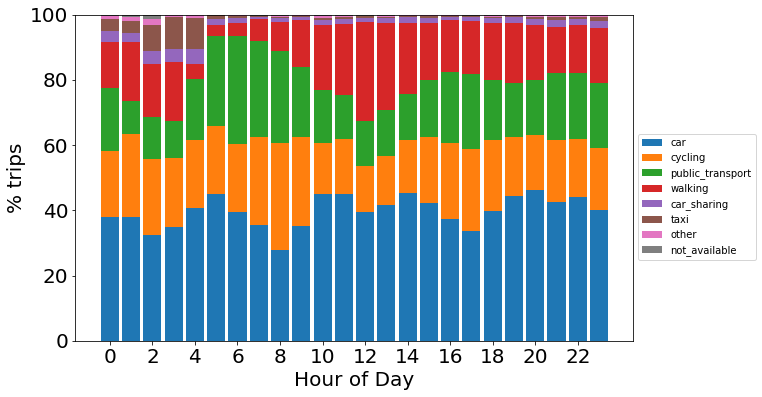

In [18]:
fig, ax = plt.subplots(1, figsize=(10,6))
ind = np.arange(24)    # the x locations for the groups
width = 0.85      # the width of the bars: can also be len(x) sequence
for i, md in enumerate(one_modes):
    vals = get_one_mode(mode_dicts=mode_hours, mode=md)
    if i == 0: 
        first_vals = vals
        ax.bar(ind, vals, width)
    elif i == 1:
        ax.bar(ind, vals, width, first_vals)
        first_vals = np.add(first_vals, vals).tolist()
    else:
        ax.bar(ind, vals, width, first_vals)
        first_vals = np.add(first_vals, vals).tolist()
    ax.legend(one_modes, bbox_to_anchor=(1, .65))
    plt.xticks(np.arange(0,24, 2), size=20)
    plt.yticks(size=20)
    ax.set_xlabel("Hour of Day", size=20)
    ax.set_ylabel("% trips", size=20)
#     plt.vlines(6.5,-10,110, color='r')
#     plt.vlines(18.5,-10,110, color='r')
#     plt.savefig("figures/hour_mode_bar.png", bbox_inches='tight')

## purpose

In [6]:
gdf.head()

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,...,endrush,thrurush,lda_word,temporal_c,start_wgs,end_wgs,start_can,end_can,geometry,hour
0,1547,None,None,2017-09-18 00:16:58-04:00,2017-09-18 00:26:26-04:00,568,1530.222174,303.572980,0.019003,WNW,...,0,0,None,0,POINT (-73.65116600000005 45.54450099999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624015.797731058 1247372.359122399),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624015.797731058 1247372.35912239...,0
1,308312,None,None,2017-09-18 02:17:46-04:00,2017-09-18 02:58:49-04:00,2463,324.869460,274.079216,0.313505,W,...,0,0,None,0,POINT (-73.65098700000003 45.54449599999979),POINT (-73.65475300000004 45.5455209999998),POINT (7624029.565886399 1247375.825611254),POINT (7623710.593941391 1247402.423920968),LINESTRING (7624029.565886399 1247375.82561125...,2
2,384772,None,None,2017-09-18 05:30:24-04:00,2017-09-18 06:17:28-04:00,2824,32009.701647,130.691098,0.272104,SE,...,1,0,None,0,POINT (-73.79999600000002 45.63632099999982),POINT (-73.62417100000005 45.53094099999978),POINT (7609795.133960674 1253993.059622761),POINT (7626500.696944128 1246510.141318924),(LINESTRING (7607307.107749196 1253237.7069476...,5
3,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,0.304086,E,...,1,1,"Monday_6, pick_up_a_person",5,POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...,6
4,199011,None,None,2017-09-18 06:18:40-04:00,2017-09-18 06:27:44-04:00,544,563.806088,96.630699,0.255485,E,...,1,1,None,0,POINT (-73.74527300000005 45.55845599999979),POINT (-73.72059400000005 45.55950099999978),POINT (7616417.181546402 1246781.286979011),POINT (7618260.407733496 1247444.31208628),(LINESTRING (7616402.393582945 1246769.1996916...,6


In [24]:
pur_hours = {}
for hr in sorted(gdf.hour.unique()):
    one_pr = gdf.loc[(gdf.hour == hr) & (gdf['purpose'].isin(one_pur))]
    pur_counts = ((one_pr['purpose'].value_counts()  / len(one_pr))*100).to_dict()
    pur_hours[hr] = pur_counts

In [41]:
colorblind_pallette = ["#7b85d4","#f37738","#83c995","#d7369e","#c4c9d8","#859795","#e9d043","#ad5b50", "#ffa07a", "k"]

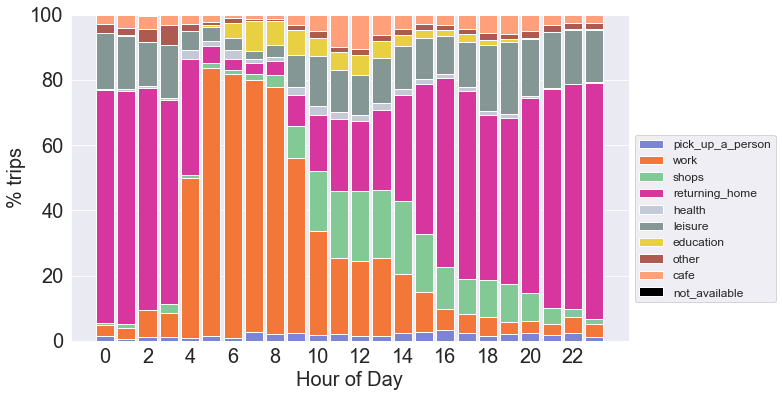

In [49]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, figsize=(10,6))
ind = np.arange(24)    # the x locations for the groups
width = 0.85      # the width of the bars: can also be len(x) sequence
for i, md, c in zip(range(len(one_pur)), one_pur, colorblind_pallette):
    vals = get_one_mode(mode_dicts=pur_hours, mode=md)
    if i == 0: 
        first_vals = vals
        ax.bar(ind, vals, width, color=c)
    elif i == 1:
        ax.bar(ind, vals, width, first_vals, color=c)
        first_vals = np.add(first_vals, vals).tolist()
    else:
        ax.bar(ind, vals, width, first_vals, color=c)
        first_vals = np.add(first_vals, vals).tolist()
    ax.legend(one_pur, bbox_to_anchor=(1, .65), fontsize=12)
    plt.xticks(np.arange(0,24, 2), size=20)
    plt.yticks(size=20)
    ax.set_xlabel("Hour of Day", size=20)
    ax.set_ylabel("% trips", size=20)
#     plt.vlines(x=5.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=9.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=14.5, ymin=0,ymax=100, color='blue', linestyles='--')
#     plt.vlines(x=18.5, ymin=0,ymax=100, color='blue', linestyles='--')
# plt.savefig("figures/hour_pur_bar.png", bbox_inches='tight')

In [6]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
month_fmt = mdates.DateFormatter("%M")

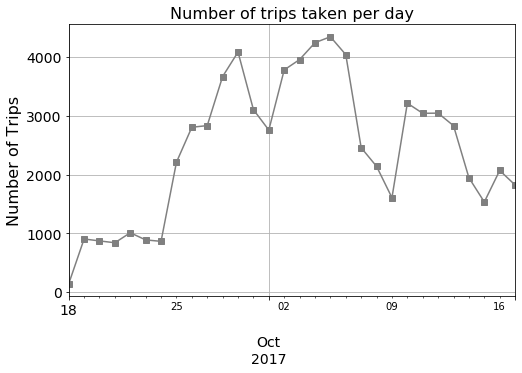

In [17]:
fig, ax = plt.subplots(1, figsize=(8,5))
gdf.dropna(subset=['purpose']).set_index('starttime').groupby(pd.Grouper(freq='d')).count()['id_trip'].plot(kind='line',ax=ax, color='grey', marker='s', grid=True)
ax.set_ylabel("Number of Trips", size=16)
ax.set_xlabel("", size=18)
plt.xticks(size=14);
plt.yticks(size=14);
plt.title("Number of trips taken per day", size=16)
# plt.savefig("figures/trips_per_day.png", bbox_inches='tight')

In [157]:
temp_to_purpose = gdf.set_index('starttime').groupby([pd.Grouper(freq='1d'), 'purpose']).agg({'temperatur':'mean', 'purpose':'count'})
temp_to_purpose.columns = ['temperature', 'count_purpose']
temp_to_purpose.reset_index(inplace=True)
temp_to_purpose.set_index('starttime', inplace=True)

temp_to_mode = gdf.loc[gdf['mode'].isin(above1000_mode)].set_index('starttime').groupby([pd.Grouper(freq='1d'), 'mode']).agg({'temperatur':'mean', 'mode':'count'})
temp_to_mode.columns = ['temperature', 'count_mode']
temp_to_mode.reset_index(inplace=True)
temp_to_mode.set_index('starttime', inplace=True)

In [158]:
temp_to_purpose.head()

,purpose,temperature,count_purpose
starttime,,,
2017-09-18 00:00:00-04:00,education,26.612205,2
2017-09-18 00:00:00-04:00,health,21.467712,2
2017-09-18 00:00:00-04:00,leisure,24.242757,14
2017-09-18 00:00:00-04:00,pick_up_a_person,22.369101,2
2017-09-18 00:00:00-04:00,returning_home,25.249733,67


In [181]:
corr_pur = {}
corr_md = {}
for u_pr, u_md in zip(gdf['purpose'].unique(), above1000_mode):
    pr_df = temp_to_purpose.loc[temp_to_purpose['purpose'] == u_pr]
    md_df = temp_to_mode.loc[temp_to_mode['mode'] == u_md]
    corr_pur[u_pr] = stats.spearmanr(pr_df['temperature'].dropna(),pr_df['count_purpose'].dropna())
    corr_md[u_md] = stats.spearmanr(md_df['temperature'].dropna(),md_df['count_mode'].dropna())
    print(u_pr, pr_df['temperature'].corr(pr_df['count_purpose']))
    

None nan
pick_up_a_person -0.45526066577025603
work -0.29899544702274145
shops -0.44624813755585957
returning_home -0.3064064348946839
health -0.3901334475469648
leisure -0.4358833244159938
education -0.37145119696552115
other -0.22596693755494984
cafe -0.3872401985729801
not_available -0.2802737954588256


In [182]:
corr_md

{'car': SpearmanrResult(correlation=-0.4829810901001112, pvalue=0.006862029611424808),
 'car_sharing': SpearmanrResult(correlation=nan, pvalue=nan),
 'cycling': SpearmanrResult(correlation=-0.3681868743047831, pvalue=0.045295235344289315),
 'public_transport': SpearmanrResult(correlation=-0.3837597330367074, pvalue=0.036300801908169755),
 'public_transport, car': SpearmanrResult(correlation=nan, pvalue=nan),
 'taxi': SpearmanrResult(correlation=nan, pvalue=nan),
 'walking': SpearmanrResult(correlation=-0.43715239154616237, pvalue=0.01570943213971118),
 'walking, car': SpearmanrResult(correlation=nan, pvalue=nan),
 'walking, cycling': SpearmanrResult(correlation=nan, pvalue=nan),
 'walking, public_transport': SpearmanrResult(correlation=-0.4456558042929084, pvalue=0.013581665063946737),
 'walking, public_transport, car': SpearmanrResult(correlation=nan, pvalue=nan)}

In [175]:
corr_pur

{None: SpearmanrResult(correlation=nan, pvalue=nan),
 'pick_up_a_person': SpearmanrResult(correlation=-0.5236667255193721, pvalue=0.002979522492441779),
 'work': SpearmanrResult(correlation=-0.37174638487208006, pvalue=0.04309733511286986),
 'shops': SpearmanrResult(correlation=-0.5039492744500437, pvalue=0.004520520973654804),
 'returning_home': SpearmanrResult(correlation=-0.3125695216907675, pvalue=0.09262649946157406)}

pick_up_a_person -0.45526066577025603


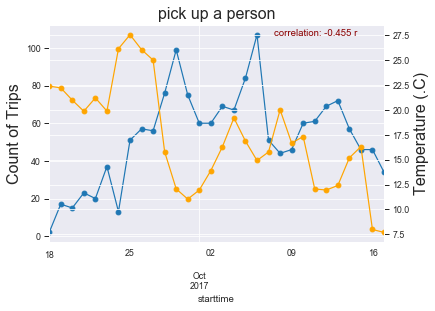

work -0.29899544702274145


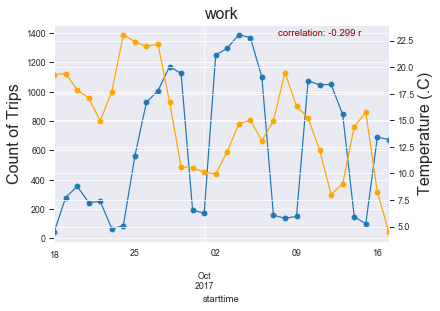

shops -0.44624813755585957


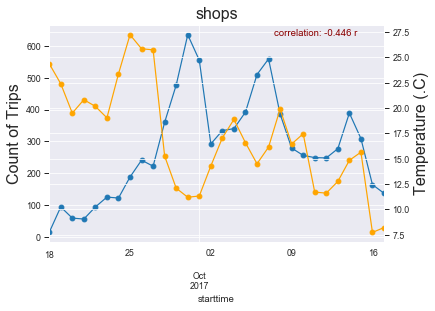

returning_home -0.3064064348946839


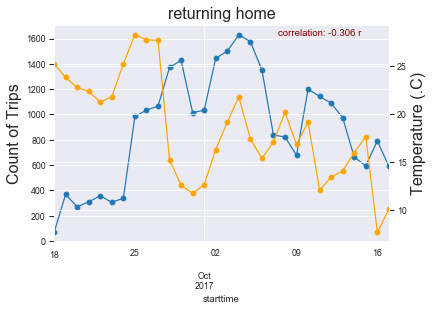

health -0.3901334475469648


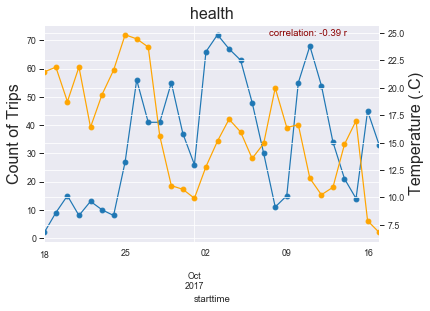

leisure -0.4358833244159938


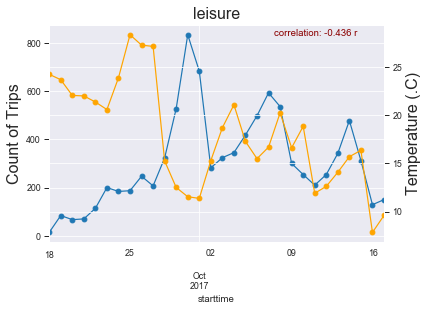

education -0.37145119696552115


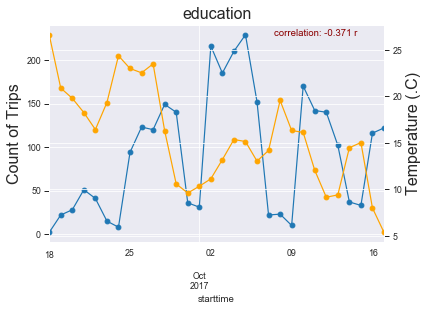

other -0.22596693755494984


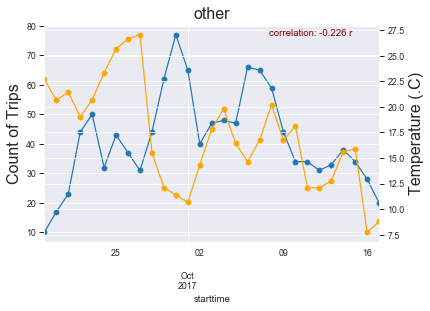

cafe -0.3872401985729801


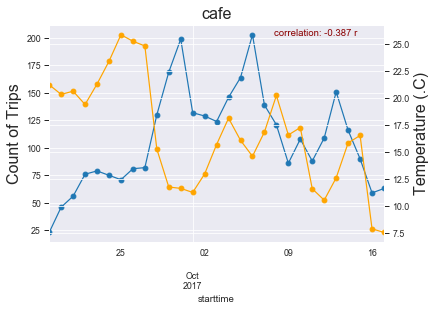

not_available -0.2802737954588256


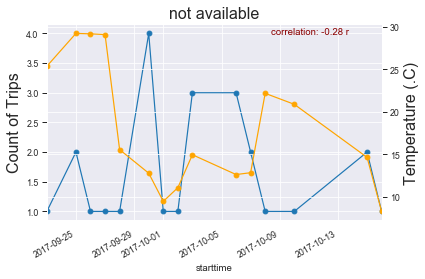

In [161]:
for u_pr in gdf.purpose.unique():
    if u_pr:
        fig, ax = plt.subplots(1)
        pr_df = temp_to_purpose.loc[temp_to_purpose['purpose'] == u_pr]
        pr_df['count_purpose'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_pr.replace('_'," ")), size=16)
        pr_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.annotate('correlation: {0} r'.format(str(round(pr_df['temperature'].corr(pr_df['count_purpose']), 3))), xy=(0.67, 0.95), xycoords='axes fraction', color='darkred')
#         plt.savefig("figures/{0}_temp_purpose.png".format(u_pr), bbox_inches='tight')
        plt.show()

In [ ]:
plt.text(s=md_df['temperature'].corr(md_df['count_mode']), x=10,y=2)

Text(2017-10-08, 25, 'correlation: -0.356 r')

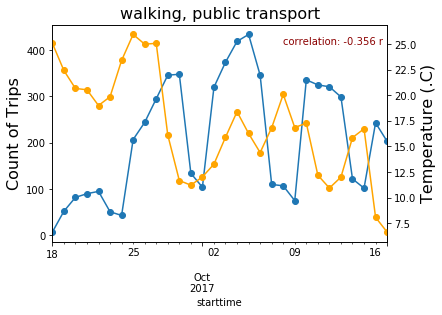

In [272]:
        fig, ax = plt.subplots(1)
        md_df = temp_to_mode.loc[temp_to_mode['mode'] == u_md]
        md_df['count_mode'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_md.replace('_'," ")), size=16)
        md_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.text(s='correlation: {0} r'.format(str(round(md_df['temperature'].corr(md_df['count_mode']), 3))), x=datetime.date(2017, 10, 8), y=25, color='darkred')
#         plt.text(s='{0}', x=datetime.date(2017, 10, 24), y=18)

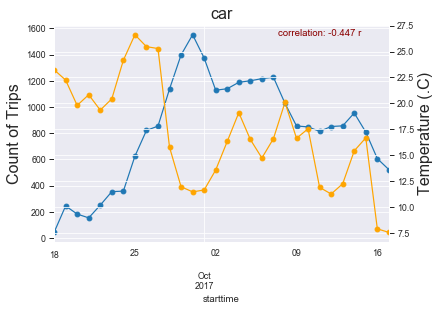

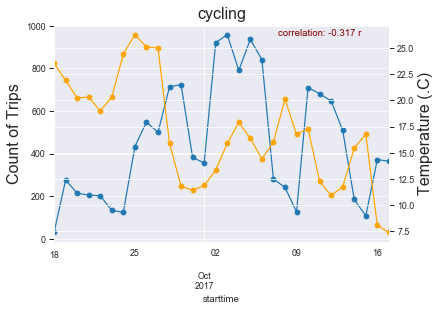

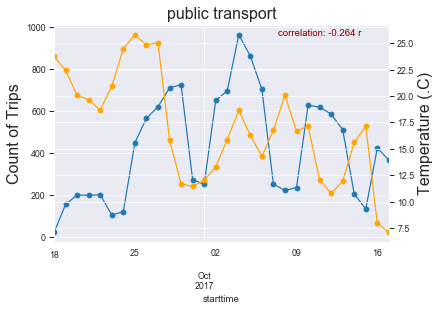

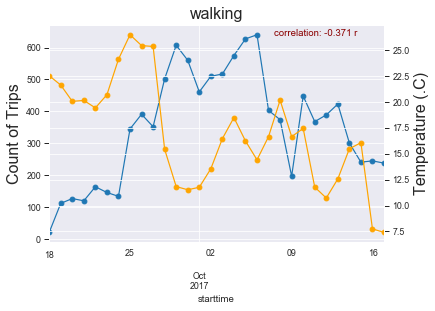

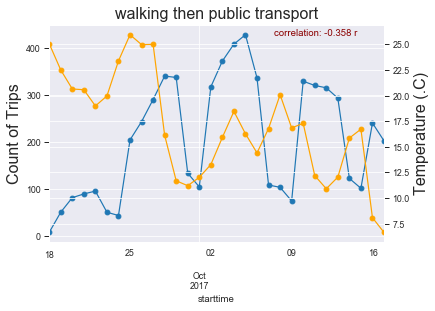

In [165]:
for u_md in above1000_mode:
    if u_md:
        fig, ax = plt.subplots(1)
        md_df = temp_to_mode.loc[temp_to_mode['mode'] == u_md]
        md_df['count_mode'].plot(ax=ax, marker='o')
        ax2 = ax.twinx()
        ax.set_title("{0}".format(u_md.replace('_'," ").replace(','," then")), size=16)
        md_df['temperature'].plot(ax=ax2, color='orange', marker='o')
        ax2.set_ylabel("Temperature (.C)", size=16)
        ax.set_ylabel("Count of Trips", size=16)
        plt.annotate('correlation: {0} r'.format(str(round(md_df['temperature'].corr(md_df['count_mode']), 3))), xy=(0.67, 0.95), xycoords='axes fraction', color='darkred')
#         plt.savefig("figures/{0}_temp_mode.png".format(u_md), bbox_inches='tight')
        plt.show()

In [24]:
gdf_purp.purpose.value_counts()

returning_home      26819
work                18950
leisure              9167
shops                8363
cafe                 3115
education            2769
pick_up_a_person     1574
other                1203
health               1044
not_available          25
Name: purpose, dtype: int64

In [79]:
gdf_purp.groupby('purpose').count()['mode']

purpose
cafe                 3115
education            2769
health               1044
leisure              9167
not_available          25
other                1203
pick_up_a_person     1574
returning_home      26819
shops                8363
work                18950
Name: mode, dtype: int64

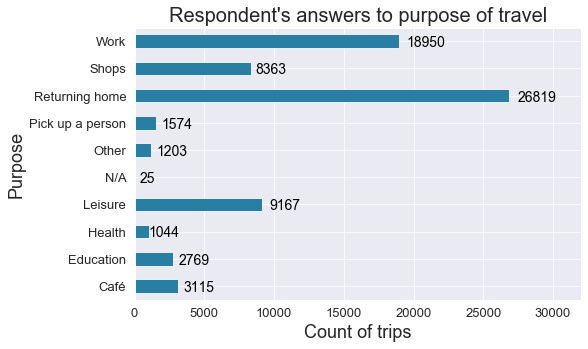

In [85]:
# returning home and work the most popular purpose
sns.set_context('paper')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(8,5))
gdf_purp.groupby('purpose').count()['mode'].plot(kind='barh', ax=ax, color='#297fa3')
ax.set_yticklabels(["Café","Education","Health","Leisure","N/A","Other","Pick up a person","Returning home","Shops","Work"], size=13)
plt.xticks(fontsize=13)
ax.set_ylabel("Purpose", size=18)
ax.set_xlabel("Count of trips", size=18)
ax.set_xlim(0,32000)
ax.set_title("Respondent's answers to purpose of travel", size=20)
plt.text(s="{0}".format(18950),x=19500,y=8.8, color='k', fontsize=14)
plt.text(s="{0}".format(8363),x=8700,y=7.8, color='k', fontsize=14)
plt.text(s="{0}".format(26819),x=27500,y=6.8, color='k', fontsize=14)
plt.text(s="{0}".format(1574),x=1900,y=5.8, color='k', fontsize=14)
plt.text(s="{0}".format(1203),x=1600,y=4.8, color='k', fontsize=14)
plt.text(s="{0}".format(25),x=400,y=3.8, color='k', fontsize=14)
plt.text(s="{0}".format(9167),x=9700,y=2.8, color='k', fontsize=14)
plt.text(s="{0}".format(1044),x=1000,y=1.8, color='k', fontsize=14)
plt.text(s="{0}".format(2769),x=3200,y=0.8, color='k', fontsize=14)
plt.text(s="{0}".format(3115),x=3500,y=-0.2, color='k', fontsize=14)
# plt.savefig("figures/purpose_hist.png", bbox_inches='tight')

In [87]:
gdf_purp

,id_trip,mode,purpose,starttime,endtime,seconds,distance_m,direction,magnitude,carddir,...,temporal_c,precip,temperatur,land_use,start_wgs,end_wgs,start_can,end_can,geometry,hour
0,150744,car,pick_up_a_person,2017-09-18 06:02:50-04:00,2017-09-18 06:17:12-04:00,862,9935.922336,85.310969,3.040857e-01,E,...,1,0.00000,18.353766,"['residential', 'employment', 'diversified act...",POINT (-73.64638500000002 45.54628999999979),POINT (-73.54531800000002 45.55066099999977),POINT (7624322.265039737 1247672.970059534),POINT (7631863.767736516 1250414.940902869),LINESTRING (7624322.265039737 1247672.97005953...,6
1,173651,car,work,2017-09-18 07:14:10-04:00,2017-09-18 08:01:46-04:00,2856,15283.760539,171.872470,2.324141e-01,S,...,2,0.00000,17.317364,None,POINT (-73.81487200000002 45.64468299999982),POINT (-73.80018800000005 45.55683299999981),POINT (7608401.68239975 1254568.515455438),POINT (7612292.411519157 1245384.496834899),LINESTRING (7608401.68239975 1254568.515455438...,7
2,81386,"walking, public_transport",work,2017-09-18 07:17:04-04:00,2017-09-18 08:07:27-04:00,3023,7757.762316,169.163581,1.219405e-01,S,...,2,0.00000,17.317364,"['mixed', 'residential', 'residential', 'insti...",POINT (-73.61387700000004 45.53915899999978),POINT (-73.55234900000006 45.4661039999998),POINT (7627021.071964022 1247630.119465985),POINT (7634038.297039393 1241110.561616503),(LINESTRING (7627033.970862066 1247936.1648094...,7
3,149086,public_transport,work,2017-09-18 07:20:42-04:00,2017-09-18 08:10:14-04:00,2972,7693.525202,170.378606,4.857499e-02,S,...,2,0.00000,17.317364,"['institution', 'residential', 'institution', ...",POINT (-73.56351300000006 45.51644699999981),POINT (-73.56519900000005 45.5008869999998),POINT (7631576.524534984 1246305.001546624),POINT (7631946.431465326 1244583.906550724),LINESTRING (7631576.524534984 1246305.00154662...,7
4,358412,walking,work,2017-09-18 07:27:38-04:00,2017-09-18 07:40:26-04:00,768,992.314303,211.576183,3.478072e-01,SSW,...,2,0.00000,17.440628,"['employment', 'religious', 'mixed', 'mixed', ...",POINT (-73.59024400000006 45.53260999999979),POINT (-73.59427000000002 45.52622499999982),POINT (7629026.972989381 1247452.25399864),POINT (7628924.956414173 1246671.107441435),LINESTRING (7629026.972989381 1247452.25399864...,7
5,350121,car,work,2017-09-18 07:31:56-04:00,2017-09-18 08:11:26-04:00,2370,33250.148027,195.329388,3.381821e-01,SSW,...,2,0.00000,17.317364,[],POINT (-73.25835500000004 45.37937699999978),POINT (-73.26531800000004 45.3121389999998),POINT (7659226.03304689 1238419.021996917),POINT (7660884.005205133 1230990.975288202),(LINESTRING (7658025.534948336 1258938.3229501...,7
6,35763,car,shops,2017-09-18 07:32:54-04:00,2017-09-18 08:04:07-04:00,1873,6832.113937,338.681845,2.750046e-03,NNW,...,2,0.00000,17.317364,None,POINT (-73.47319700000004 45.40842999999978),POINT (-73.47267300000004 45.4089819999998),POINT (7641918.591122856 1236660.830229675),POINT (7641940.751710548 1236732.420940157),LINESTRING (7641918.591122856 1236660.83022967...,7
7,230363,public_transport,work,2017-09-18 07:33:37-04:00,2017-09-18 08:16:09-04:00,2552,8500.854359,127.802412,9.812761e-02,SE,...,2,0.00000,17.317364,"['residential', 'residential', 'residential', ...",POINT (-73.62875300000005 45.54330699999981),POINT (-73.56421700000004 45.50222999999978),POINT (7625757.792981774 1247745.26746936),POINT (7631978.136315048 1244751.293023325),(LINESTRING (7625449.252399736 1247376.6710083...,7
8,223745,walking,work,2017-09-18 07:36:48-04:00,2017-09-18 07:42:12-04:00,324,216.682653,213.081606,4.999280e-01,SSW,...,2,0.00000,17.440628,"['residential', 'mixed']",POINT (-73.60913100000005 45.54017199999978),POINT (-73.61063300000006 45.53856699999979),POINT (7627349.52474691 1247846.19573503),POINT (7627286.592117633 1247638.863323786),"LINESTRING (7627349.52474691 1247846.19573503,...",7
9,17106,cycling,work,2017-09-18 07:44:21-04:00,2017-09-18 08:27:02-04:00,2561,15794.079345,184.728074,2.906062e-01,S,...,2,0.00000,17.317364,"['institut

In [107]:
gdf.groupby('mode').count()['purpose'][gdf.groupby('mode').count()['purpose'] >= 300]

mode
car                               24585
car_sharing                         899
cycling                           13512
public_transport                  12674
public_transport, car               932
taxi                                350
walking                           10538
walking, car                        489
walking, cycling                    757
walking, public_transport          6134
walking, public_transport, car      558
Name: purpose, dtype: int64

Text(3500, -0.2, '3115')

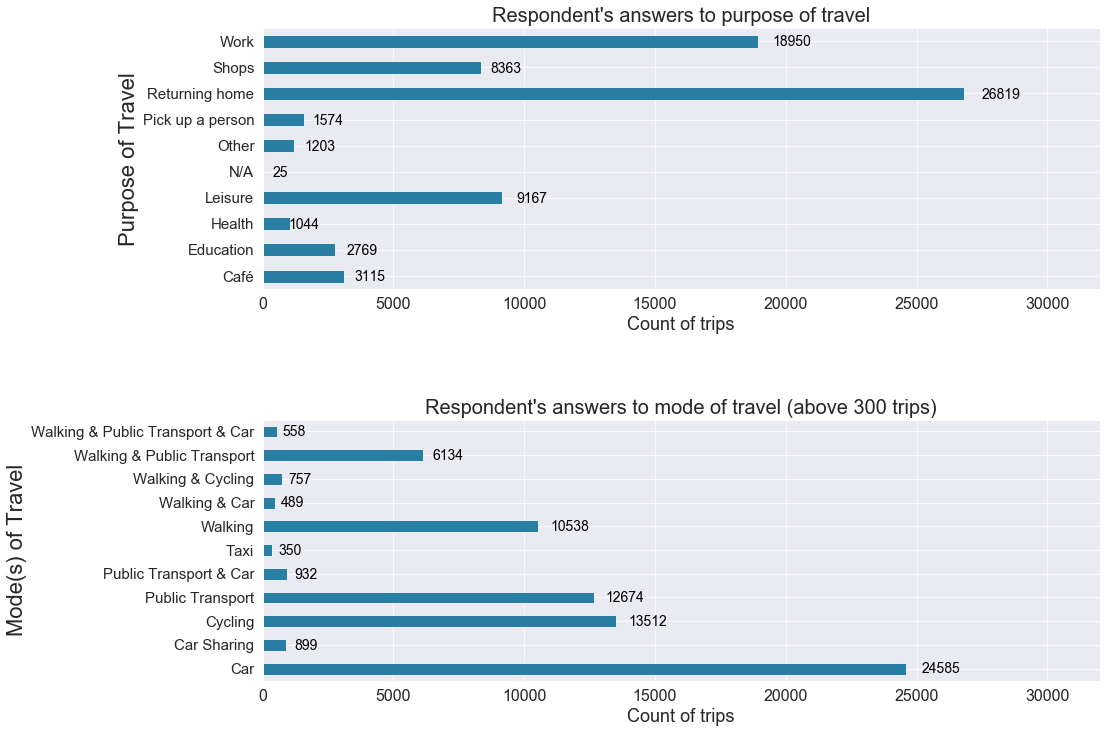

In [130]:
# returning home and work the most popular purpose
sns.set_context('paper')
sns.set_style('darkgrid')
fig, (ax2, ax) = plt.subplots(2,1, figsize=(12,10))
plt.subplots_adjust(hspace=.5)
gdf.groupby('mode').count()['purpose'][gdf.groupby('mode').count()['purpose'] >= 300].plot(kind='barh', ax=ax, color='#297fa3')

ax.set_title("Respondent's answers to mode of travel (above 300 trips)", size=20)

ax.set_yticklabels(["Car","Car Sharing","Cycling","Public Transport","Public Transport & Car", "Taxi",\
    "Walking","Walking & Car","Walking & Cycling","Walking & Public Transport","Walking & Public Transport & Car"], size=15)
plt.xticks(fontsize=13)
ax.set_ylabel("Mode(s) of Travel", size=22)
ax.set_xlabel("Count of trips", size=18)
ax.set_xlim(0,32000)
ax.set_xticklabels(np.arange(0, 32000, 5000), size=16)
ax.text(s="{0}".format(558),x=750,y=9.8, color='k', fontsize=14)
ax.text(s="{0}".format(6134),x=6500,y=8.8, color='k', fontsize=14)
ax.text(s="{0}".format(757),x=1000,y=7.8, color='k', fontsize=14)
ax.text(s="{0}".format(489),x=700,y=6.8, color='k', fontsize=14)
ax.text(s="{0}".format(10538),x=11000,y=5.8, color='k', fontsize=14)
ax.text(s="{0}".format(350),x=600,y=4.8, color='k', fontsize=14)
ax.text(s="{0}".format(932),x=1200,y=3.8, color='k', fontsize=14)
ax.text(s="{0}".format(12674),x=13100,y=2.8, color='k', fontsize=14)
ax.text(s="{0}".format(13512),x=14000,y=1.8, color='k', fontsize=14)
ax.text(s="{0}".format(899),x=1200,y=0.8, color='k', fontsize=14)
ax.text(s="{0}".format(24585),x=25200,y=-0.2, color='k', fontsize=14)


gdf_purp.groupby('purpose').count()['mode'].plot(kind='barh', ax=ax2, color='#297fa3')
ax2.set_yticklabels(["Café","Education","Health","Leisure","N/A","Other","Pick up a person","Returning home","Shops","Work"], size=15)
# plt.xticks(fontsize=13)
ax2.set_xticklabels(np.arange(0, 32000, 5000), size=16)
ax2.set_ylabel("Purpose of Travel", size=22)
ax2.set_xlabel("Count of trips", size=18)
ax2.set_xlim(0,32000)
ax2.set_title("Respondent's answers to purpose of travel", size=20)
ax2.text(s="{0}".format(18950),x=19500,y=8.8, color='k', fontsize=14)
ax2.text(s="{0}".format(8363),x=8700,y=7.8, color='k', fontsize=14)
ax2.text(s="{0}".format(26819),x=27500,y=6.8, color='k', fontsize=14)
ax2.text(s="{0}".format(1574),x=1900,y=5.8, color='k', fontsize=14)
ax2.text(s="{0}".format(1203),x=1600,y=4.8, color='k', fontsize=14)
ax2.text(s="{0}".format(25),x=400,y=3.8, color='k', fontsize=14)
ax2.text(s="{0}".format(9167),x=9700,y=2.8, color='k', fontsize=14)
ax2.text(s="{0}".format(1044),x=1000,y=1.8, color='k', fontsize=14)
ax2.text(s="{0}".format(2769),x=3200,y=0.8, color='k', fontsize=14)
ax2.text(s="{0}".format(3115),x=3500,y=-0.2, color='k', fontsize=14)
# plt.savefig("figures/mode_purpose_hist.png", bbox_inches='tight')

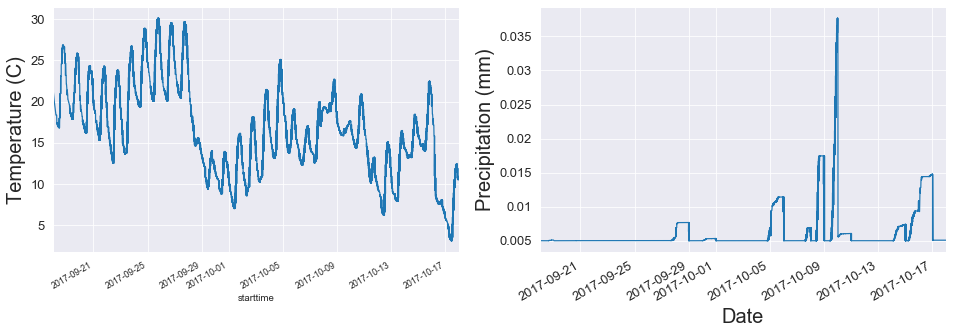

In [155]:
## plot weather 
fig, (ax, ax2) = plt.subplots(1,2, figsize=(16,5))
plt.subplots_adjust(wspace=.2)
gdf.set_index('starttime').temperatur.plot(ax=ax)
gdf.set_index('starttime').precip.plot(ax=ax2)
ax2.set_ylabel("Precipitation (mm)",size=20)
ax.set_ylabel("Temperature (C)",size=20)
ax2.set_yticklabels(np.arange(0,0.05,0.005),size=13);
ax.set_yticklabels(np.arange(0,35,5),size=13);
ax2.set_xlabel("Date", size=20)
plt.xticks(size=13)
# plt.savefig("figures/temp_precip_time.png", bbox_inches='tight')

In [ ]:
## investigate skew
for pur in gdf.purpose.unique():
    print(pur, "dist", np.mean(purp_gdf.loc[purp_gdf.purpose == pur]['distance_m']/1000))
    print(pur, "dur", np.mean(purp_gdf.loc[purp_gdf.purpose == pur]['seconds']/60))
    print(pur, "dist sd", np.std(purp_gdf.loc[purp_gdf.purpose == pur]['distance_m']/1000))
    print(pur, "dur sd", np.std(purp_gdf.loc[purp_gdf.purpose == pur]['seconds']/60))
    print(pur, "dist", stats.skew(purp_gdf.loc[purp_gdf.purpose == pur]['distance_m']/1000))
    print(pur, "dur", stats.skew(purp_gdf.loc[purp_gdf.purpose == pur]['seconds']/60))

In [ ]:
## plot trip duration and distance
gdf['trip_durations'] = round((gdf.seconds / 60))
gdf_trip_durations_per_purpose = gdf.groupby(['purpose','trip_durations']).agg({'seconds':'count'}).reset_index()
colorblind_pallette = ["#7b85d4","#f37738","#83c995","#d7369e","#c4c9d8","#859795","#e9d043","#ad5b50", "#ffa07a", "k"]
fig, ax = plt.subplots(1, figsize=(10,6))
counter = 0
for pur, c in zip(gdf.purpose.unique(), colorblind_pallette):
    if counter % 2 == 0:
        gdf_trip_durations_per_purpose.loc[gdf_trip_durations_per_purpose.purpose == pur].set_index('trip_durations').seconds.plot(marker='o',markersize=3, color=c, ax=ax)
    else:
        gdf_trip_durations_per_purpose.loc[gdf_trip_durations_per_purpose.purpose == pur].set_index('trip_durations').seconds.plot(marker='o',markersize=3, color=c, ax=ax)
    plt.title("Trip duration rounded to the nearest minute", size=22)
    plt.legend([pur for pur in gdf.purpose.unique()], fontsize=15)
    plt.ylim(0,800)
    plt.xlim(0,66)
    plt.xticks(np.arange(0,70,10), size=16)
    plt.yticks(size=16)
    plt.xlabel("Trip Duration (minutes)", size=22)
    plt.ylabel("Count of Trips", size=22)
    counter += 1
# plt.savefig("figures/average_trip_duration_per_purpose.png", bbox_inches='tight')

In [ ]:
purp_gdf['trip_distances'] = round(purp_gdf.distance_m / 1000)

## literature review - compare models

In [ ]:
literature_review_model_comparison = pd.read_csv("../../MSc_Dissertation/write_up/other_figures/literature_review_comparison_models.csv")
literature_review_model_comparison
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, figsize=(10,6))
for i, c in zip(literature_review_model_comparison.columns[1:6], colorblind_pallette):
#     if i in ["Work"]
    literature_review_model_comparison[i].plot(marker='s', ax=ax, color=c, linewidth=1)
    ax.text(s="--Rule Based--", color='red', x=-.2, y=-83, size=16)
    ax.text(s="--Logit--", color='navy', x=1.55, y=-83, size=16)
    ax.text(s="--ANN--", color='green', x=2.6, y=-83, size=16)
    ax.text(s="-----------Random Forest-----------", color='m', x=3.8, y=-83, size=16)
    ax.text(s="--SVM--", color='lightblue', x=7.5, y=-83, size=16)
    ax.set_ylabel("Accuracy (%)", size=18)

#     ax.set_xlabel("Study", size=18)
    ax.set_xticklabels(labels=list(literature_review_model_comparison.Study.values), rotation=90, size=18);
plt.legend(fontsize=13)
plt.yticks(size=16)
plt.title("Accuracy of Trip Purpose Classification Models", size=22)
# plt.savefig("../../MSc_Dissertation/write_up/other_figures/classification_model_lit_review.png", bbox_inches='tight')